# Examen Segundo Parcial (Práctico)
### Laboratorio de Aprendizaje Estadístico

José Armando Melchor Soto  | 745697

--- 




### Librerías: 

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.formula.api as smf
import warnings
import numpy as np
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn import discriminant_analysis, neighbors
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns


warnings.simplefilter(action='ignore', category=FutureWarning)

colors = ["cornflowerblue", "indianred", "darkseagreen", "plum", "dimgray"]

---

### Dataset : 
Recursos Humanos

In [100]:
df= pd.read_csv('hr_role.csv')

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  MaritalStatus           

### Visualización del Dataset

In [102]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,is_satisfied
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,80,0,8,0,1,6,4,0,5,True
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,80,1,10,3,3,10,7,1,7,False
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,80,0,7,3,3,0,0,0,0,False
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,80,0,8,3,3,8,7,3,0,False
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,80,1,6,3,3,2,2,2,2,False


### Explicación de las variables

---

#### Se busca predecir si está satisfecho

In [103]:
df['is_satisfied']

0        True
1       False
2       False
3       False
4       False
        ...  
1465     True
1466    False
1467    False
1468    False
1469    False
Name: is_satisfied, Length: 1470, dtype: bool

In [104]:
target= 'is_satisfied'
y= df[target]

In [105]:
len(df[df['is_satisfied'] == 1]), len(df[df['is_satisfied'] == 0])

(459, 1011)

#### Dummies

In [106]:
df= pd.get_dummies(df, drop_first=True)

#### NaN's

In [107]:
pd.DataFrame(df.isnull().sum()).T

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,MonthlyIncome,MonthlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
df.isna().sum()

Age                                  0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EnvironmentSatisfaction              0
HourlyRate                           0
JobInvolvement                       0
JobLevel                             0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StandardHours                        0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsInCurrentRole                   0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0
is_satisfied                         0
Attrition_Yes                        0
BusinessTravel_Travel_Fre

Ninguna Variable tiene NaN's , así que podemos continuar

#### Función Bivariado

In [170]:
def bivariado(df):
    num_features = df.iloc[:, :].columns
    df_numerical = df.iloc[:, :].copy()

    for feature in num_features:
        df_numerical[f'{feature}_bins'] = pd.qcut(df_numerical[feature], q=5, labels=False, duplicates='drop')

        if df_numerical[f'{feature}_bins'].isna().sum() > 0:
            print(f"Advertencia: {feature} tiene valores NaN en la segmentación.")

        grouped = df_numerical.groupby(f'{feature}_bins').mean()

        fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 
        
        sns.lineplot(x=grouped[feature], y=grouped['is_satisfied'], marker='o', color='#b30000', ax=axes[0])
        axes[0].set_title(f'Relación de {feature} con is_satisfied')
        axes[0].set_xlabel(feature)
        axes[0].set_ylabel('is_satisfied')
        axes[0].grid()

        sns.histplot(df_numerical[feature], bins=50, color='#b30000', edgecolor='black', kde=True, ax=axes[1])
        axes[1].set_title(f'Distribución de {feature}')
        axes[1].set_xlabel(feature)
        axes[1].set_ylabel('Frecuencia')

        plt.show()

#### Función Calibración 

In [113]:
def calibracion(predicciones, y, bins):
    df_calibracion = pd.DataFrame({
        'predicciones': predicciones,
        'y': y
    })
    
    df_calibracion['bins'] = pd.qcut(df_calibracion['predicciones'], q=bins, labels=False) + 1
    gropuped = df_calibracion.groupby('bins').mean()
    
    plt.plot(gropuped.predicciones, gropuped.y, label="Modelo", marker="o")
    plt.plot(gropuped.predicciones, gropuped.predicciones, label="Real", marker="o")
    plt.grid()
    plt.legend()
    plt.xlabel("Prediccion")
    plt.ylabel("Real")

### Analisis Bivariado

#### Modelo

Se pide que el modelo tenga: 

test set: 20%
random_state: 42

In [ ]:
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Feature Engineering

In [114]:

#Tiempo
df['Tiempo en la empresa'] = df['YearsAtCompany'] / (df['YearsInCurrentRole']+1)
df['Tiempo empresa/experencia']= df['YearsAtCompany'] / (df['TotalWorkingYears']+1)
df['Tiempo empresa/edad']= df['YearsAtCompany'] / df['Age'] 
df['Tiempo en el puesto/edad']= df['YearsInCurrentRole'] / df['Age']




#### CrossValidation

##### - Gridsearch

##### - Random search

#### Correlación con la variable

In [116]:
df.corr()["is_satisfied"].sort_values(ascending=False)

is_satisfied                 1.000000
PercentSalaryHike            0.042461
Gender_Male                  0.040752
StockOptionLevel             0.023456
Tiempo empresa/experencia    0.018817
EnvironmentSatisfaction      0.017072
Tiempo en la empresa         0.015242
TrainingTimesLastYear        0.010379
Tiempo en el puesto/edad     0.007047
Tiempo empresa/edad          0.006304
MonthlyIncome               -0.004324
YearsInCurrentRole          -0.004955
YearsAtCompany              -0.004973
RelationshipSatisfaction    -0.006683
JobLevel                    -0.007099
Education                   -0.007216
TotalWorkingYears           -0.007801
YearsSinceLastPromotion     -0.008285
YearsWithCurrManager        -0.009267
Age                         -0.009489
DistanceFromHome            -0.013470
JobInvolvement              -0.014526
MonthlyRate                 -0.019855
WorkLifeBalance             -0.029936
HourlyRate                  -0.040093
Name: is_satisfied, dtype: float64

#### **Modelos**

##### KNN Clasificador

##### Regresión Logística

In [ ]:
model = linear_model.LogisticRegression().fit(X_train, y_train)
probabilidades_modelo1 = model.predict_proba(X_test)[:, 1]

c:\Users\ppmel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### Polinomica 2

In [119]:
pipeline = Pipeline([
     ('scaler', StandardScaler()),
     ('poly_features', PolynomialFeatures(degree=2)),
     ('model', linear_model.LogisticRegression(penalty='l2'))
])

pipeline.fit(X_train, y_train)
probabilidades_modelo2 = pipeline.predict_proba(X_test)[:, 1]

c:\Users\ppmel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### Polinomica 3

In [121]:
pipeline = Pipeline([
     ('scaler', StandardScaler()),
     ('poly_features', PolynomialFeatures(degree=3)),
     ('model', linear_model.LogisticRegression(penalty='l2'))
])

pipeline.fit(X_train, y_train)
probabilidades_modelo3 = pipeline.predict_proba(X_test)[:, 1]

##### Red Neuronal

##### Analisis de Discriminante Lineal

In [123]:
pipeline = Pipeline([
     ('scaler', StandardScaler()),
     ('model', discriminant_analysis.LinearDiscriminantAnalysis())
])

pipeline.fit(X_train, y_train)
probabilidades_modelo_disc = pipeline.predict_proba(X_test)[:, 1]

##### Juntos

In [165]:
juntos = pd.DataFrame({
     'real': y_test,
     'logistica1': probabilidades_modelo1,
     'logistica2': probabilidades_modelo2,
     'logistica3': probabilidades_modelo3,
     'probabilidades_disc': probabilidades_modelo_disc
})

juntos.head()

,real,logistica1,logistica2,logistica3,probabilidades_disc
515,False,0.361393,0.418411,0.398042,0.389281
306,False,0.309925,0.433848,0.588312,0.381386
1255,False,0.393069,0.296305,0.029493,0.307601
378,True,0.212622,0.008824,0.000022,0.195008
332,False,0.309779,0.169130,0.007870,0.321062


In [166]:
# Bins
bins = 5
juntos['bins_log1'] = pd.qcut(juntos['logistica1'], bins, labels=False) + 1
juntos['bins_log2'] = pd.qcut(juntos['logistica2'], bins, labels=False) + 1
juntos['bins_log3'] = pd.qcut(juntos['logistica3'], bins, labels=False) + 1
juntos['bins_disc'] = pd.qcut(juntos['probabilidades_disc'], bins, labels=False) + 1

# Agrupaciones
grouped_log1 = juntos.groupby('bins_log1').mean()
grouped_log2 = juntos.groupby('bins_log2').mean()
grouped_log3 = juntos.groupby('bins_log3').mean()
grouped_disc = juntos.groupby('bins_disc').mean()

#### **Histograma, Calibración, roc AUC y AUC por modelo**

##### Regresión Logistica

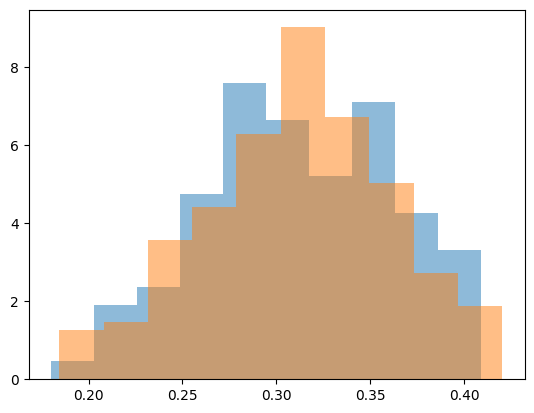

In [ ]:
plt.hist(juntos[juntos.real == 1].logistica1, density=True, alpha=0.5, bins=10)
plt.hist(juntos[juntos.real == 0].logistica1, density=True, alpha=0.5, bins=10)
plt.show()

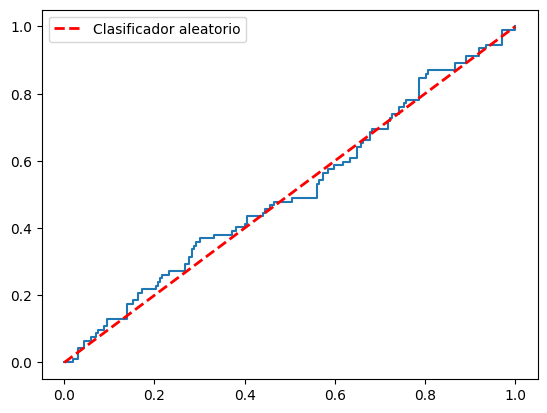

In [148]:
fpr, fnp, scores = roc_curve(y_score=probabilidades_modelo1, y_true=y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')
plt.legend()


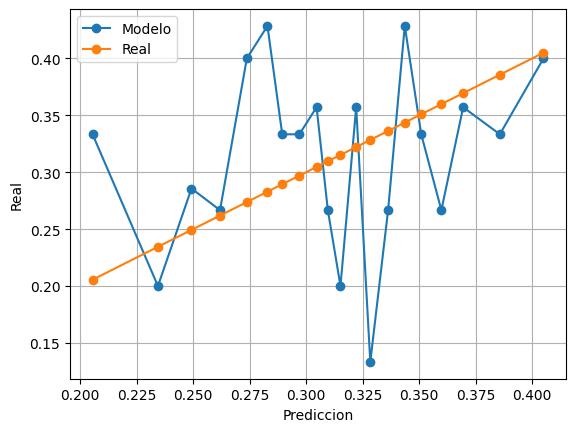

In [152]:
calibracion(probabilidades_modelo1, y_test, 20)

In [154]:
print('AUC: ',roc_auc_score(y_score= probabilidades_modelo1, y_true=y_test))

AUC:  0.5088786052518295


##### Polinomica 2

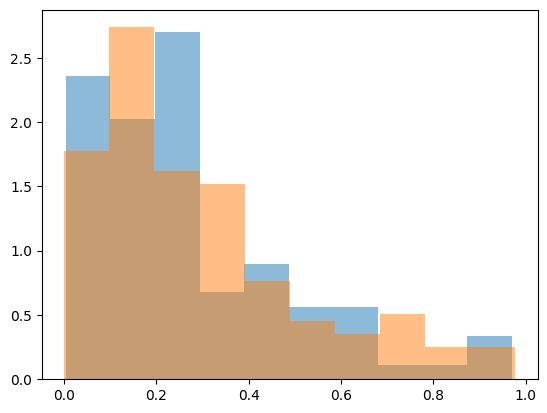

In [131]:
plt.hist(juntos[juntos.real == 1].logistica2, density=True, alpha=0.5, bins=10)
plt.hist(juntos[juntos.real == 0].logistica2, density=True, alpha=0.5, bins=10)
plt.show()

AUC:  0.4704584588893672


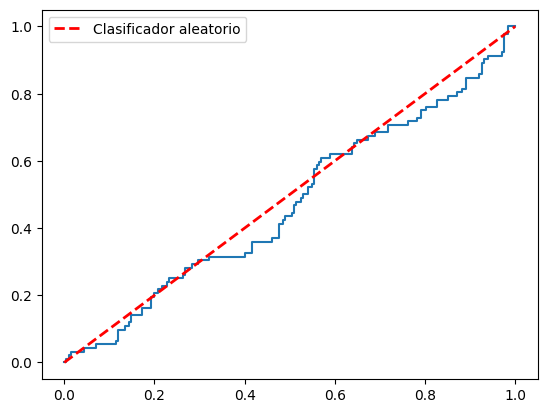

In [ ]:
fpr, fnp, scores = roc_curve(y_score=probabilidades_modelo2, y_true=y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')
plt.legend()


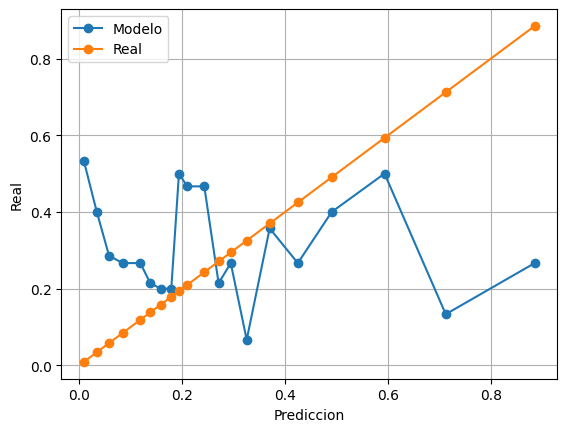

In [155]:
calibracion(probabilidades_modelo2, y_test, 20)

In [156]:
print('AUC: ',roc_auc_score(y_score= probabilidades_modelo2, y_true=y_test))

AUC:  0.4704584588893672


##### Polinomial  Grado 3

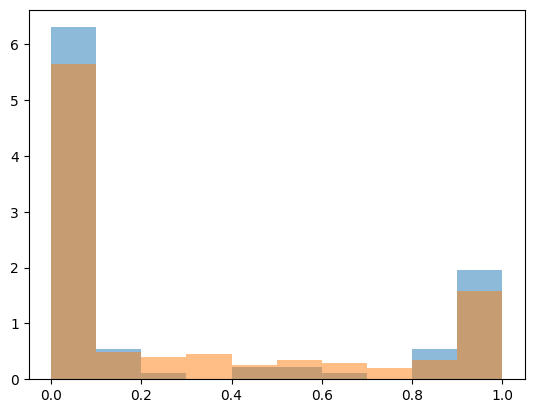

In [133]:
plt.hist(juntos[juntos.real == 1].logistica3, density=True, alpha=0.5, bins=10)
plt.hist(juntos[juntos.real == 0].logistica3, density=True, alpha=0.5, bins=10)
plt.show()

AUC:  0.48407232027550584


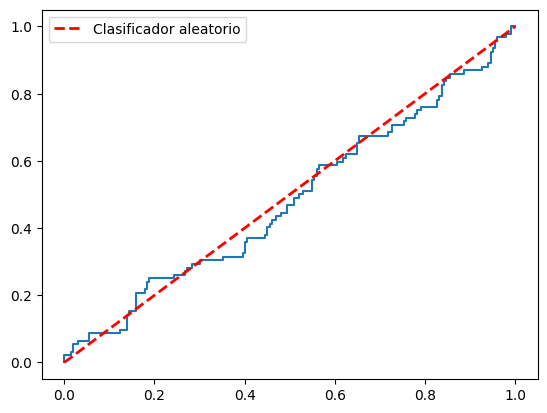

In [134]:
fpr, fnp, scores = roc_curve(y_score=probabilidades_modelo3, y_true=y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')
plt.legend()
print('AUC: ',roc_auc_score(y_score= probabilidades_modelo3, y_true=y_test))

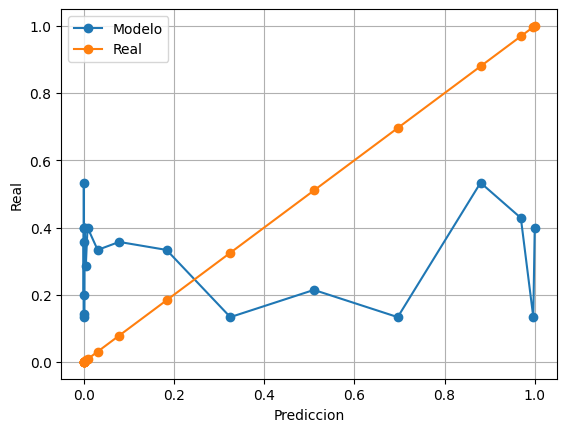

In [157]:
calibracion(probabilidades_modelo3, y_test, 20)

In [158]:
print('AUC: ',roc_auc_score(y_score= probabilidades_modelo3, y_true=y_test))

AUC:  0.48407232027550584


#### Red Neuronal

##### Discriminante Lineal

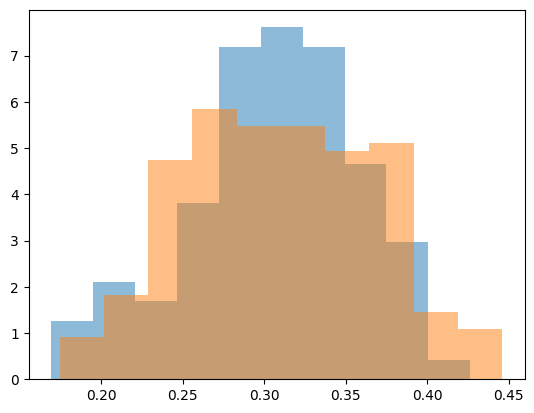

In [135]:
plt.hist(juntos[juntos.real == 1].probabilidades_disc, density=True, alpha=0.5, bins=10)
plt.hist(juntos[juntos.real == 0].probabilidades_disc, density=True, alpha=0.5, bins=10)
plt.show()

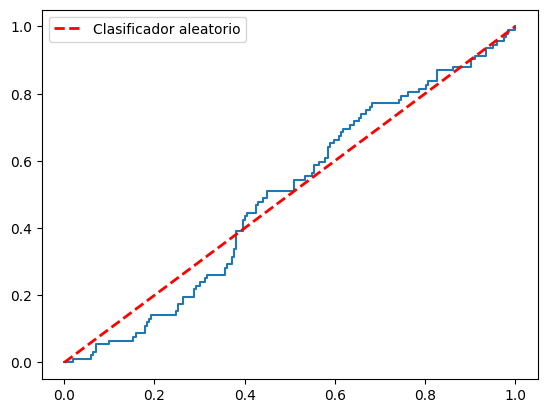

In [159]:
fpr, fnp, scores = roc_curve(y_score=probabilidades_modelo_disc, y_true=y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')
plt.legend()

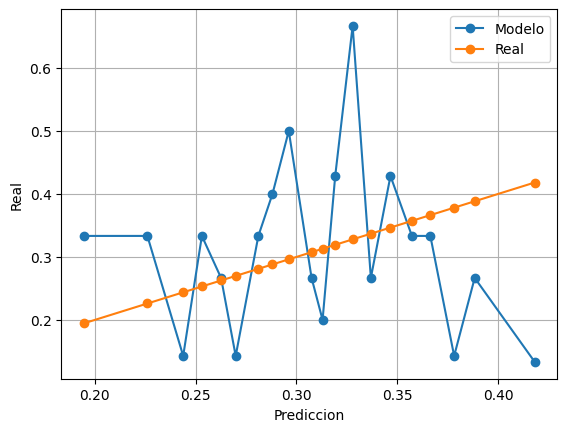

In [162]:
calibracion(probabilidades_modelo_disc, y_test, 20)

In [160]:
print('AUC: ',roc_auc_score(y_score= probabilidades_modelo_disc, y_true=y_test))

AUC:  0.49483426603529923


##### Juntos

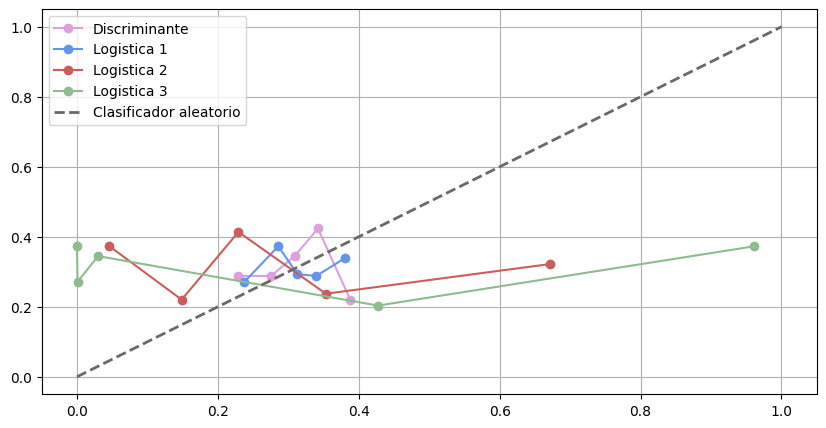

In [169]:
## Grafico de modelos
plt.figure(figsize=(10, 5))
plt.plot(grouped_disc.probabilidades_disc, grouped_disc.real, marker='o', label='Discriminante', color=colors[3])
plt.plot(grouped_log1.logistica1, grouped_log1.real, marker='o', label='Logistica 1', color=colors[0])
plt.plot(grouped_log2.logistica2, grouped_log2.real, marker='o', label='Logistica 2', color=colors[1])
plt.plot(grouped_log3.logistica3, grouped_log3.real, marker='o', label='Logistica 3', color=colors[2])
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, label='Clasificador aleatorio', color=colors[-1])
plt.legend()
plt.grid()
